In [58]:
import pandas as pd
pd.set_option('display.max_columns',None) 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense 
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC

In [59]:
# We take the oversampling dataset from Clustering
df = pd.read_csv('../Dataset/OverSampling.csv')

In [60]:
df.shape

(100000, 47)

In [61]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [62]:
df = df.drop(['ID','Description','End_Lat', 'End_Lng','Country','Weather_Condition','Timezone','Number','Zipcode','Airport_Code','Street'], axis=1)
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Side,City,County,State,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,1,2020-06-12 12:56:58,2020-06-12 13:41:58,32.17783,-110.96829,0.0,R,Tucson,Pima,AZ,2020-06-12 12:58:00,100.0,100.0,12.0,27.23,10.0,WSW,9.0,0.0,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
1,1,2020-04-14 16:34:14,2020-04-14 17:19:14,33.63992,-112.11400,0.0,R,Phoenix,Maricopa,AZ,2020-04-14 16:53:00,76.0,76.0,15.0,28.36,10.0,WSW,10.0,0.0,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
2,1,2020-05-18 07:40:53,2020-05-18 08:25:53,31.76764,-106.47350,0.0,R,El Paso,El Paso,TX,2020-05-18 07:40:00,73.0,73.0,20.0,26.10,10.0,CALM,0.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
3,1,2020-04-11 13:44:49,2020-04-11 14:49:47,31.71112,-106.36806,0.0,R,El Paso,El Paso,TX,2020-04-11 13:40:00,72.0,72.0,11.0,25.94,10.0,SW,17.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
4,1,2020-05-08 14:19:50,2020-05-08 15:24:48,33.48051,-112.01290,0.0,L,Phoenix,Maricopa,AZ,2020-05-08 13:51:00,98.0,98.0,10.0,28.66,10.0,W,9.0,0.0,False,False,True,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


**Prepare The Data**

Wind Direction

In [63]:
df["Wind_Direction"].unique()

array(['WSW', 'CALM', 'SW', 'W', 'VAR', 'NNW', 'S', 'NW', 'SSW', 'WNW',
       'NNE', 'E', 'N', 'SSE', 'SE', 'ESE', nan, 'ENE', 'NE', 'North',
       'Calm', 'Variable', 'West', 'South', 'East'], dtype=object)

In [64]:
df.loc[df['Wind_Direction']=='Calm','Wind_Direction'] = 'CALM'
df.loc[(df['Wind_Direction']=='West')|(df['Wind_Direction']=='WSW')|(df['Wind_Direction']=='WNW'),'Wind_Direction'] = 'W'
df.loc[(df['Wind_Direction']=='South')|(df['Wind_Direction']=='SSW')|(df['Wind_Direction']=='SSE'),'Wind_Direction'] = 'S'
df.loc[(df['Wind_Direction']=='North')|(df['Wind_Direction']=='NNW')|(df['Wind_Direction']=='NNE'),'Wind_Direction'] = 'N'
df.loc[(df['Wind_Direction']=='East')|(df['Wind_Direction']=='ESE')|(df['Wind_Direction']=='ENE'),'Wind_Direction'] = 'E'
df.loc[df['Wind_Direction']=='Variable','Wind_Direction'] = 'VAR'
print("Wind Direction after simplification: ", df['Wind_Direction'].unique())

Wind Direction after simplification:  ['W' 'CALM' 'SW' 'VAR' 'N' 'S' 'NW' 'E' 'SE' nan 'NE']


Create features from Start_Time and End_Time

In [65]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Start_Year'] = df['Start_Time'].dt.year
nmonth = df['Start_Time'].dt.month
df['Start_Month'] = nmonth
df['Start_Weekday']= df['Start_Time'].dt.weekday
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
nday = [days_each_month[arg-1] for arg in nmonth.values]
nday = nday + df["Start_Time"].dt.day.values
df['Start_Day'] = nday
df['Start_Hour'] = df['Start_Time'].dt.hour
df['Start_Minute']=df['Start_Hour']*60.0+df["Start_Time"].dt.minute


df['End_Time'] = pd.to_datetime(df['End_Time'])
df['End_Year'] = df['End_Time'].dt.year
month = df['End_Time'].dt.month
df['End_Month'] = month
df['End_Weekday']= df['End_Time'].dt.weekday
days_each_month = np.cumsum(np.array([0,31,28,31,30,31,30,31,31,30,31,30,31]))
day = [days_each_month[arg-1] for arg in month.values]
day = day + df["End_Time"].dt.day.values
df['End_Day'] = day
df['End_Hour'] = df['End_Time'].dt.hour
df['End_Minute']=df['End_Hour']*60.0+df["End_Time"].dt.minute

df['Duration'] = (df['End_Time'] - df['Start_Time']).values.astype('float')

In [66]:
df[['Duration','Start_Year','Start_Month','Start_Weekday','Start_Day','Start_Hour','Start_Minute',
    'End_Year','End_Month','End_Weekday','End_Day','End_Hour','End_Minute']].head()

,Duration,Start_Year,Start_Month,Start_Weekday,Start_Day,Start_Hour,Start_Minute,End_Year,End_Month,End_Weekday,End_Day,End_Hour,End_Minute
0,2.700000e+12,2020,6,4,163,12,776.0,2020,6,4,163,13,821.0
1,2.700000e+12,2020,4,1,104,16,994.0,2020,4,1,104,17,1039.0
2,2.700000e+12,2020,5,0,138,7,460.0,2020,5,0,138,8,505.0
3,3.898000e+12,2020,4,5,101,13,824.0,2020,4,5,101,14,889.0
4,3.898000e+12,2020,5,4,128,14,859.0,2020,5,4,128,15,924.0


Create features from Weather_Timestamp

In [67]:
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'])
df['date_of_Weather_Timestamp'] = df.Weather_Timestamp.dt.date
df['Weather_Timestamp_Year'] = df.Weather_Timestamp.dt.year
df['Weather_Timestamp_Month'] = df.Weather_Timestamp.dt.month
df['Weather_Timestamp_Day'] = df.Weather_Timestamp.dt.day
df['Weather_Timestamp_Weekday'] = df.Weather_Timestamp.dt.dayofweek
df['Weather_Timestamp_Hour'] = df.Weather_Timestamp.dt.hour

In [68]:
df[['date_of_Weather_Timestamp','Weather_Timestamp_Year','Weather_Timestamp_Month','Weather_Timestamp_Day',
    'Weather_Timestamp_Weekday','Weather_Timestamp_Hour']].head()

,date_of_Weather_Timestamp,Weather_Timestamp_Year,Weather_Timestamp_Month,Weather_Timestamp_Day,Weather_Timestamp_Weekday,Weather_Timestamp_Hour
0,2020-06-12,2020.0,6.0,12.0,4.0,12.0
1,2020-04-14,2020.0,4.0,14.0,1.0,16.0
2,2020-05-18,2020.0,5.0,18.0,0.0,7.0
3,2020-04-11,2020.0,4.0,11.0,5.0,13.0
4,2020-05-08,2020.0,5.0,8.0,4.0,13.0


Convert to booleans with 0 and 1

In [69]:
df = df.replace([True, False], [1,0])
df = df.replace(["Day","Night"],[1,0])
df = df.replace(["R","L"],[1,0])

We dont need Start_Time, End_Time, Weather_Timestamp and date_of_Weather_Timestamp so we drop them

In [70]:
df = df.drop(['Start_Time'] , axis=1)
df = df.drop(['End_Time'] , axis=1)
df.drop(['Weather_Timestamp','date_of_Weather_Timestamp'],axis=1,inplace=True)

df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Side,City,County,State,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Weekday,Start_Day,Start_Hour,Start_Minute,End_Year,End_Month,End_Weekday,End_Day,End_Hour,End_Minute,Duration,Weather_Timestamp_Year,Weather_Timestamp_Month,Weather_Timestamp_Day,Weather_Timestamp_Weekday,Weather_Timestamp_Hour
0,1,32.17783,-110.96829,0.0,1,Tucson,Pima,AZ,100.0,100.0,12.0,27.23,10.0,W,9.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,1.0,2020,6,4,163,12,776.0,2020,6,4,163,13,821.0,2.700000e+12,2020.0,6.0,12.0,4.0,12.0
1,1,33.63992,-112.11400,0.0,1,Phoenix,Maricopa,AZ,76.0,76.0,15.0,28.36,10.0,W,10.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,1.0,2020,4,1,104,16,994.0,2020,4,1,104,17,1039.0,2.700000e+12,2020.0,4.0,14.0,1.0,16.0
2,1,31.76764,-106.47350,0.0,1,El Paso,El Paso,TX,73.0,73.0,20.0,26.10,10.0,CALM,0.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,2020,5,0,138,7,460.0,2020,5,0,138,8,505.0,2.700000e+12,2020.0,5.0,18.0,0.0,7.0
3,1,31.71112,-106.36806,0.0,1,El Paso,El Paso,TX,72.0,72.0,11.0,25.94,10.0,SW,17.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,1.0,1.0,2020,4,5,101,13,824.0,2020,4,5,101,14,889.0,3.898000e+12,2020.0,4.0,11.0,5.0,13.0
4,1,33.48051,-112.01290,0.0,0,Phoenix,Maricopa,AZ,98.0,98.0,10.0,28.66,10.0,W,9.0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,1.0,1.0,1.0,1.0,2020,5,4,128,14,859.0,2020,5,4,128,15,924.0,3.898000e+12,2020.0,5.0,8.0,4.0,13.0


In [71]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 'Side', 'City',
       'County', 'State', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight',
       'Start_Year', 'Start_Month', 'Start_Weekday', 'Start_Day', 'Start_Hour',
       'Start_Minute', 'End_Year', 'End_Month', 'End_Weekday', 'End_Day',
       'End_Hour', 'End_Minute', 'Duration', 'Weather_Timestamp_Year',
       'Weather_Timestamp_Month', 'Weather_Timestamp_Day',
       'Weather_Timestamp_Weekday', 'Weather_Timestamp_Hour'],
      dtype='object')

In [72]:
df= df.rename(columns = {'Distance(mi)' : 'Distance_mi','Temperature(F)' : 'Temperature_F' ,'Wind_Chill(F)':'Wind_Chill_F',
                         'Humidity(%)' : 'Humidity_percentage' ,'Pressure(in)':'Pressure_in','Visibility(mi)': 'Visibility_mi',
                           'Wind_Speed(mph)': 'Wind_Speed_mph', 'Precipitation(in)': 'Precipitation_in' })

In [73]:
df.isnull().sum()

Severity                         0
Start_Lat                        0
Start_Lng                        0
Distance_mi                      0
Side                             0
City                            13
County                           0
State                            0
Temperature_F                 2131
Wind_Chill_F                 25801
Humidity_percentage           2251
Pressure_in                   1856
Visibility_mi                 2350
Wind_Direction                2213
Wind_Speed_mph                7665
Precipitation_in             30995
Amenity                          0
Bump                             0
Crossing                         0
Give_Way                         0
Junction                         0
No_Exit                          0
Railway                          0
Roundabout                       0
Station                          0
Stop                             0
Traffic_Calming                  0
Traffic_Signal                   0
Turning_Loop        

In [74]:
#HANDLING MISSING VALUES
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Temperature_F_op = df.groupby('City').apply(lambda l: l.Temperature_F.median()).astype(float).round(1)
df.loc[:, 'Temperature_F'] = df.groupby('City', group_keys=False).apply(lambda l: l.Temperature_F.fillna(Temperature_F_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Wind_Chill_F_op = df.groupby('City').apply(lambda l: l.Wind_Chill_F.median()).astype(float).round(2)
df.loc[:, 'Wind_Chill_F'] = df.groupby('City', group_keys=False).apply(lambda l: l.Wind_Chill_F.fillna(Wind_Chill_F_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Humidity_percentage_op = df.groupby('City').apply(lambda l: l.Humidity_percentage.median()).astype(float).round(1)
df.loc[:, 'Humidity_percentage'] = df.groupby('City', group_keys=False).apply(lambda l: l.Humidity_percentage.fillna(Humidity_percentage_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Visibility_mi_op = df.groupby('City').apply(lambda l: l.Visibility_mi.median()).astype(float).round(1)
df.loc[:, 'Visibility_mi'] = df.groupby('City', group_keys=False).apply(lambda l: l.Visibility_mi.fillna(Visibility_mi_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Wind_Speed_mph_op = df.groupby('City').apply(lambda l: l.Wind_Speed_mph.median()).astype(float).round(1)
df.loc[:, 'Wind_Speed_mph'] = df.groupby('City', group_keys=False).apply(lambda l: l.Wind_Speed_mph.fillna(Wind_Speed_mph_op[l.name]))
# Fill NaN values  --  USE the AVERAGE per "class" (e.g. City)
Precipitation_in_op = df.groupby('City').apply(lambda l: l.Precipitation_in.median()).astype(float).round(2)
df.loc[:, 'Precipitation_in'] = df.groupby('City', group_keys=False).apply(lambda l: l.Precipitation_in.fillna(Precipitation_in_op[l.name]))

df.drop(["City"],axis=1)
df=df.dropna()
df.isna().sum()

Severity                     0
Start_Lat                    0
Start_Lng                    0
Distance_mi                  0
Side                         0
City                         0
County                       0
State                        0
Temperature_F                0
Wind_Chill_F                 0
Humidity_percentage          0
Pressure_in                  0
Visibility_mi                0
Wind_Direction               0
Wind_Speed_mph               0
Precipitation_in             0
Amenity                      0
Bump                         0
Crossing                     0
Give_Way                     0
Junction                     0
No_Exit                      0
Railway                      0
Roundabout                   0
Station                      0
Stop                         0
Traffic_Calming              0
Traffic_Signal               0
Turning_Loop                 0
Sunrise_Sunset               0
Civil_Twilight               0
Nautical_Twilight            0
Astronom

**Drop Outliers**

In [75]:
#DEFINE A FUNCTION WHICH RETURNS A LIST OF INDEX OF OUTLIERS
def outliers(d_f , ft):
    Q1 = d_f[ft].quantile(0.25)
    Q3 = d_f[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_indexes = d_f.index[ (d_f[ft] < lower_bound) | (d_f[ft] > upper_bound) ]

    return outliers_indexes

    #CREATE AN EMPTY LIST TO STORE THE OUTPUT INDICES FROM MULTIPLE COLUMNS
index_list = []
for feature in ['Temperature_F','Wind_Chill_F','Humidity_percentage', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in']:
    index_list.extend( outliers(df , feature) )

#DEFINE A FUNCTION WHICH RETURNS A CLEANED DF WITHOUT OUTLIERS
def remove( d_f , outliers_indexes ):
    outliers_indexes = sorted(set(outliers_indexes))
    d_f = d_f.drop(outliers_indexes)
   
    return d_f

df = remove(df , index_list)
df.shape

(73569, 51)

<AxesSubplot:>

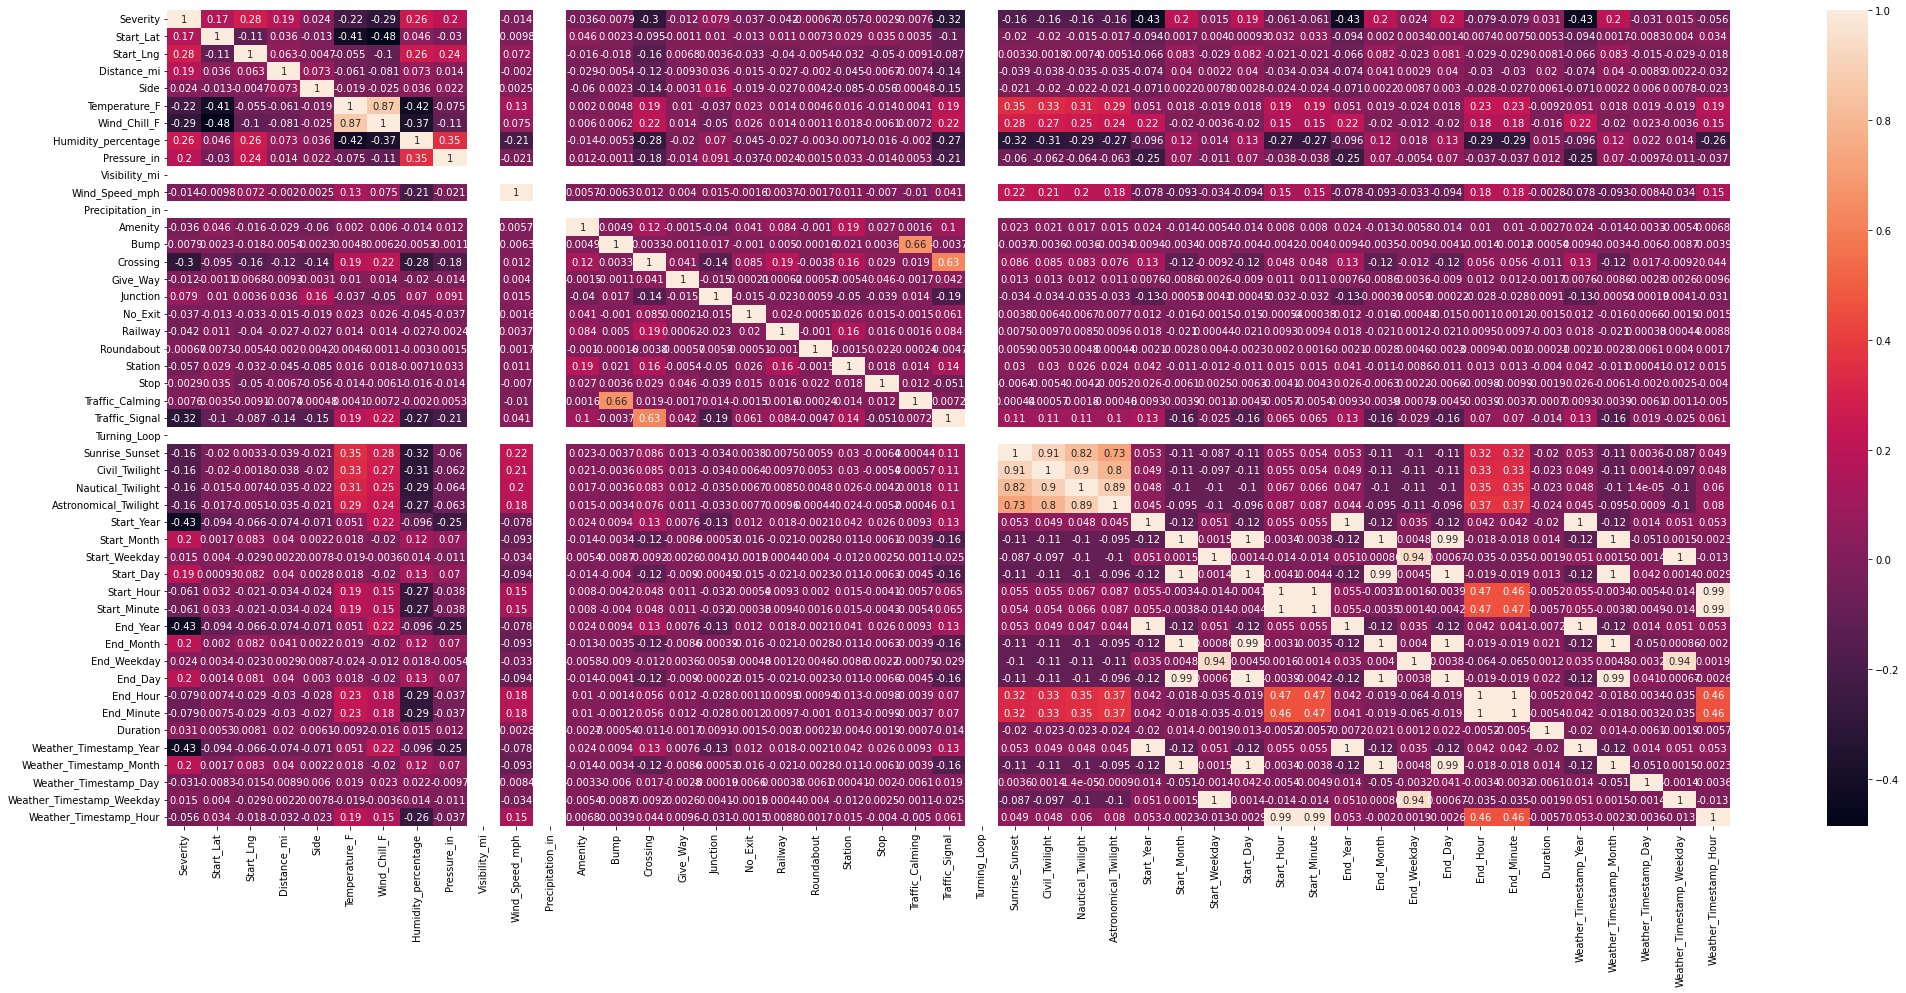

In [76]:
fig, ax = plt.subplots(figsize=(35, 15))

sns.heatmap(df.corr(), ax=ax, annot=True)

In [77]:
object_values = ["State",'Wind_Direction',"County"]
df[object_values] = df[object_values].astype('category')
df = pd.get_dummies(df, columns=object_values, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73569 entries, 0 to 99999
Columns: 1285 entries, Severity to County_Yuma
dtypes: float64(22), int64(25), object(1), uint8(1237)
memory usage: 114.3+ MB


In [78]:
df.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'Distance_mi', 'Side', 'City',
       'Temperature_F', 'Wind_Chill_F', 'Humidity_percentage', 'Pressure_in',
       ...
       'County_Yates', 'County_Yavapai', 'County_Yazoo', 'County_Yell',
       'County_Yellow Medicine', 'County_Yellowstone', 'County_Yolo',
       'County_York', 'County_Yuba', 'County_Yuma'],
      dtype='object', length=1285)

Normalaze

In [79]:
y = df['Severity']
X= df.drop(["Severity"],axis = 1)